<a href="https://colab.research.google.com/github/prodramp/DeepWorks/blob/main/ConvolutionOnImageDemo/Convolution_Filter_Live.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **How does Convolution filter works on input image?**

### **What we are covering:**
- Kernel or Filter size
- Kernel values applied on given source image  
- The feature extraction in Convolution

Resources:
- https://towardsdatascience.com/deciding-optimal-filter-size-for-cnns-d6f7b56f9363
- https://medium.com/analytics-vidhya/how-to-choose-the-size-of-the-convolution-filter-or-kernel-size-for-cnn-86a55a1e2d15
- https://ai.stackexchange.com/questions/5092/how-are-the-kernels-initialized-in-a-convolutional-neural-network

In [1]:
import cv2
import numpy as np
# Required for the Google Colab
from google.colab.patches import cv2_imshow

In [2]:
def convolution_filter_demo(source_image, kernel):

    kernel_size = len(kernel)

    row = source_image.shape[0] - kernel_size + 1
    col = source_image.shape[1] - kernel_size + 1

    result_image = np.zeros(shape=(row, col))
    print(row, col)
    for i in range(row):
        for j in range(col):
            current = source_image[i:i+kernel_size, j:j+kernel_size]
            #print(current)
            multiplication = np.abs(np.sum(np.sum(current * kernel)))
            result_image[i, j] = multiplication
            #print(result_image)
    return result_image

In [7]:
# https://docs.opencv.org/3.4/d8/d6a/group__imgcodecs__flags.html
# cv2.IMREAD_UNCHANGED = -1
# cv2.IMREAD_GRAYSCALE = 0
source_image = cv2.imread("dog.jpeg",cv2.IMREAD_GRAYSCALE)
channels = None
if len(source_image.shape) == 2:
  height, width = source_image.shape
elif len(source_image.shape) == 3:
  height, width, channels = source_image.shape
print(height, width, channels)

452 400 None


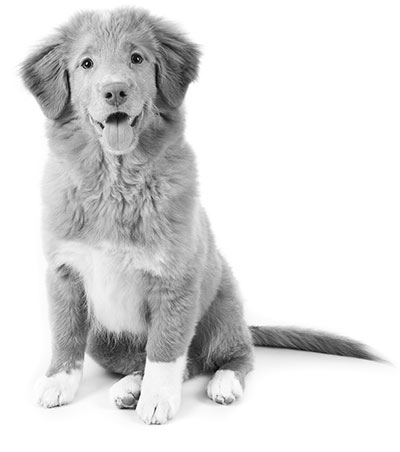

In [8]:
cv2_imshow(source_image)

In [ ]:
k = [[0, -1, 0], 
     [-1, 0, -1], 
     [0, -1, 0]]
k = [[1, 1, 1], 
     [1, 0, 1], 
     [1, 1, 1]]
     

450 398


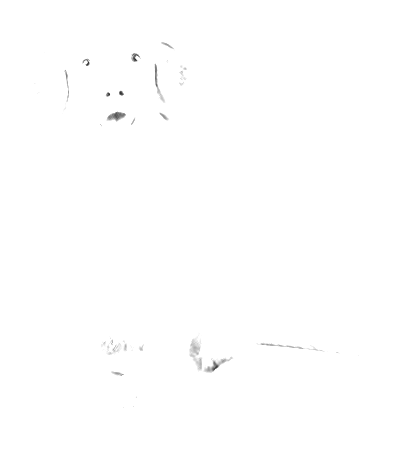

------------------------------------------
450 398


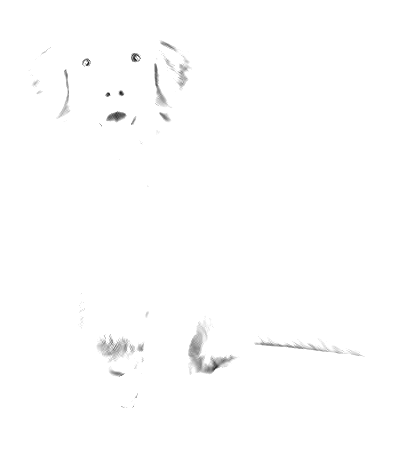

------------------------------------------
450 398


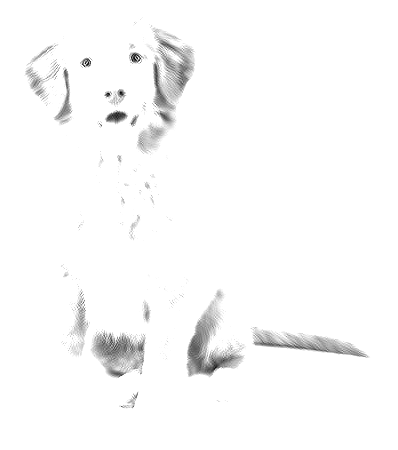

------------------------------------------
450 398


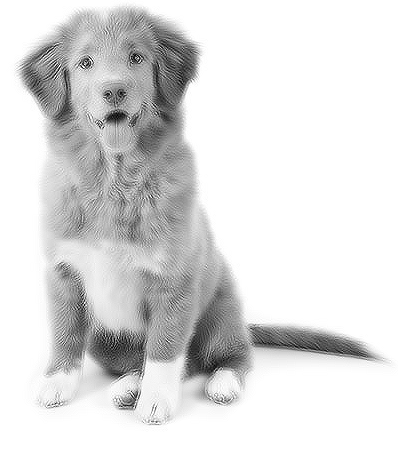

------------------------------------------
450 398


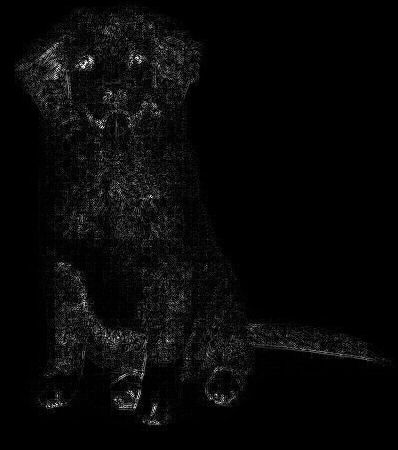

------------------------------------------


In [14]:
for n in range(5):
  #k = [[0, 0, 0], [0, n, 0], [0, 0, 0]] ## Bad
  # k = [[1, 1, 1], [1, n, 1], [1, 1, 1]] ## Bad
  # k = [[-1, -1, -1], [-1, n, -1], [-1, -1, -1]]
  # k = [[-1, 0, -1], [0, n, 0], [-1, 0, -1]] ## Better 
  k = [[0, -1, 0], [-1, n, -1], [0, -1, 0]] ## Best
  filtered_image = convolution_filter_demo(source_image, k)
  cv2_imshow(filtered_image)
  # cv2.imshow("in",source_image)
  # cv2.imshow("out",filtered_image)
  print("------------------------------------------")
  cv2.waitKey(0)